In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy, umath
import ldd

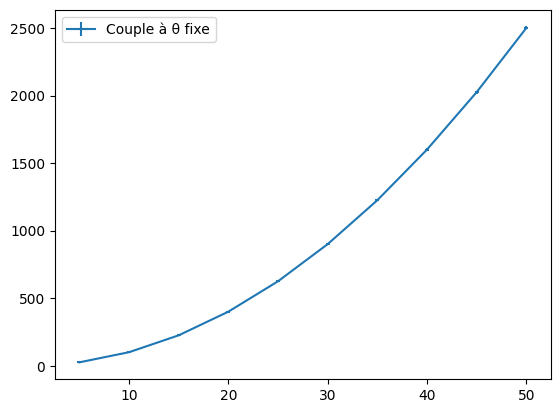

In [8]:
"""
    Vérification que le couple est constant
"""
theta = ufloat(np.pi/2, np.pi/18)
r = unumpy.uarray([5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 0.2)
F = unumpy.uarray([5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 0.1)

ldd.plot_error(r, r * F, label="Couple à θ fixe")
plt.legend()

In [12]:
"""
    Calcul de D par méthode statique
"""

theta = unumpy.uarray([10, 30, 60, 90, 120, 150, 180, 210], std_devs=3) * np.pi/180
r = ufloat(5, std_dev=0.2) * 10**(-2)
F = unumpy.uarray([0.08, 0.28, 0.58, 0.86, 1.08, 1.3, 1.62, 1.88], std_devs=0.04)

D = r * F / theta
D_mean=np.mean(D)
print(D_mean)

[2.291831180523293+/-1.3394964123365238
 2.6738030439438423+/-0.4783654335040162
 2.7692960097989787+/-0.26061183340321414
 2.7374650211806+/-0.1911221669085383
 2.578310078088705+/-0.1546285901396701
 2.482817112233567+/-0.13477708189227988
 2.578310078088705+/-0.12859128466429276
 2.564668225823685+/-0.12183591736436072]
0.0258+/-0.0021


17.14+/-0.15 0.1592+/-0.0035


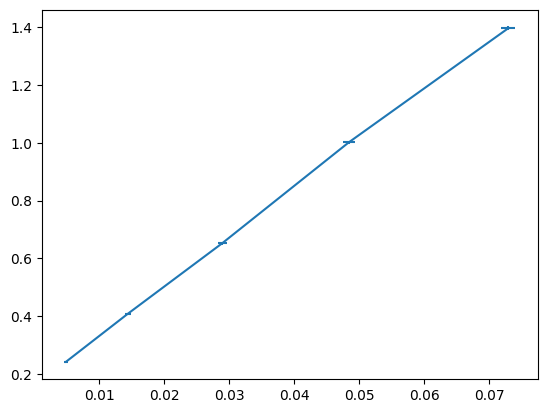

In [24]:
m1=211.69 * 10**(-2)
m2=211.96 * 10**(-2)
T_27=np.array([7.47,7.44,7.47,7.47,7.41,7.50,7.34,7.37,7.37,7.41])
T_22=np.array([6.25,6.34,6.31,6.25,6.28,6.40,6.19,6.32,6.31,6.29,6.28,6.25])
T_17=np.array([5.03,5.06,5.06,5.06,5.07,5.09,5.15,5.15,4.94,5.13])
T_12=np.array([4.13,3.97,4.00,4.07,4.10,4.00,4.03,3.94,3.94,3.97])
T_7=np.array([3.06,3.09,2.97,3.07,3.12,3.16,3.12,3.09,3.10,3.06,3.18])

all_T = [T_27, T_22, T_17, T_12, T_7]
periode = []
r = unumpy.uarray([27, 22, 17, 12, 7], std_devs=0.2) * 10**(-2)

for T in all_T:
    mean = np.mean(T)
    N = len(T)
    error = np.sqrt(1/(N*(N-1)) * np.sum((T - mean)**2))
    periode.append(ufloat(mean, error))

T = np.array(periode)

ldd.plot_error(r**2, T**2/(4 * np.pi**2))
(a,b) = ldd.odr_fit(ldd.linear_function, r**2, T**2/(4 * np.pi**2), p0=[20, 1])

print(a, b)
D = (m1 + m2) / a
print(D)

In [14]:
T_sphère=np.array([1.35,1.28,1.31,1.38,1.25,1.19,1.28,1.28,1.31,1.28,1.35,1.41,1.41,1.40,1.31,1.46,1.34,1.35,1.38,1.40,1.37])
T_moyenne=np.mean(T_sphère)
print(T_moyenne)
m_sphère=0.64487
r_sphère=0.07

m_creux=0.34728
m_plein=0.38609


I_sphère=2*m_sphère*r_sphère**2/5

T_théo=2* np.pi * (I_sphère/D_mean)**(1/2)
print(T_théo)

1.3376190476190477
1.39+/-0.06
